# IE - Master in Business Analytics and Big Data

## Recommendation Systems

## Building a Collaborative Filtering Recommendation Engine
### By: Alain Grullón González

Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the critics dataset

In [4]:
crit_df = pd.read_csv("C:/Users/alain/OneDrive/Desktop/MBD/Term 2 (Python)/7. Recommendation Engines (10)/Lab 1/Data/critics.csv")
crit_df.head(20)

,User,Star Wars IV - A New Hope,Star Wars VI - Return of the Jedi,Forrest Gump,The Shawshank Redemption,The Silence of the Lambs,Gladiator,Toy Story,Saving Private Ryan,Pulp Fiction,...,Shakespeare in Love,Total Recall,Independence Day,Blade Runner,Groundhog Day,The Matrix,Schindler's List,The Sixth Sense,Raiders of the Lost Ark,Babe
0,John,1.0,5.0,2.0,NaN,4.0,4.0,2.0,2.0,NaN,...,2.0,NaN,5.0,2.0,NaN,4.0,2.0,5.0,NaN,NaN
1,Maria,5.0,3.0,NaN,2.0,4.0,2.0,1.0,NaN,NaN,...,3.0,2.0,2.0,NaN,2.0,NaN,5.0,1.0,3.0,NaN
2,Anton,NaN,NaN,NaN,5.0,2.0,NaN,4.0,NaN,NaN,...,NaN,1.0,4.0,4.0,1.0,1.0,2.0,3.0,1.0,3.0
3,Roger,NaN,3.0,NaN,NaN,NaN,1.0,2.0,3.0,4.0,...,NaN,4.0,1.0,3.0,5.0,NaN,5.0,1.0,1.0,2.0
4,Martina,4.0,3.0,4.0,1.0,4.0,1.0,NaN,4.0,NaN,...,5.0,1.0,NaN,4.0,NaN,3.0,5.0,5.0,NaN,NaN
5,Ana,2.0,4.0,4.0,4.0,NaN,NaN,3.0,1.0,4.0,...,5.0,2.0,4.0,NaN,1.0,NaN,NaN,3.0,NaN,2.0
6,Sergi,NaN,NaN,3.0,1.0,1.0,4.0,NaN,5.0,2.0,...,1.0,NaN,NaN,3.0,NaN,1.0,NaN,NaN,5.0,2.0
7,Marc,4.0,NaN,NaN,NaN,3.0,2.0,2.0,NaN,3.0,...,NaN,2.0,3.0,2.0,4.0,NaN,1.0,3.0,5.0,NaN
8,Jim,5.0,1.0,NaN,4.0,2.0,4.0,4.0,4.0,NaN,...,2.0,3.0,1.0,NaN,5.0,NaN,NaN,NaN,NaN,5.0
9,Chris,4.0,2.0,NaN,5.0,3.0,NaN,4.0,3.0,4.0,...,NaN,NaN,2.0,NaN,NaN,2.0,5.0,1.0,NaN,NaN


**1) Pearson correlation coefficient**

Calculate the Pearson correlation coefficient between Sophia and Nuria.

Lets first take a look at both Users:

In [5]:
# Index the dataframe into only the two ladies
ladies_df = crit_df.loc[(crit_df["User"]=="Sophia")|(crit_df["User"]=="Nuria")]
ladies_df

,User,Star Wars IV - A New Hope,Star Wars VI - Return of the Jedi,Forrest Gump,The Shawshank Redemption,The Silence of the Lambs,Gladiator,Toy Story,Saving Private Ryan,Pulp Fiction,...,Shakespeare in Love,Total Recall,Independence Day,Blade Runner,Groundhog Day,The Matrix,Schindler's List,The Sixth Sense,Raiders of the Lost Ark,Babe
11,Nuria,3.0,5.0,2.0,NaN,2.0,NaN,2.0,NaN,1.0,...,3.0,NaN,3.0,NaN,2.0,5.0,NaN,NaN,NaN,2.0
14,Sophia,4.0,4.0,NaN,NaN,5.0,5.0,2.0,NaN,3.0,...,NaN,1.0,3.0,NaN,2.0,NaN,3.0,NaN,3.0,1.0


Nuria's DataFrame

In [6]:
# Locate only Nuria
Nuria_df = ladies_df.loc[ladies_df["User"]=="Nuria"]
# Drop User column to get only values
Nuria_df = Nuria_df.drop(["User"],1)
# Conver DataFrame to series
Nuria_ser = Nuria_df.iloc[0]
#Nuria_ser

Sophia's DataFrame

In [7]:
# Locate only Sophia
Sophia_df = ladies_df.loc[ladies_df["User"]=="Sophia"]
# Drop User column to get only values
Sophia_df = Sophia_df.drop(["User"],1)
# Conver DataFrame to series
Sophia_ser = Sophia_df.iloc[0]
#Sophia_ser

Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

The Pearson's correlation coefficient for these two ladies is:

In [8]:
Pearson = Sophia_ser.corr(Nuria_ser,method='pearson')
print("The Pearson correlation coefficient for Sophia and Nuria is:", Pearson)

The Pearson correlation coefficient for Sophia and Nuria is: 0.36514837167011077


**2) Compare two movie critics**

Using the calculated Pearson correlation in the previous section. Compare and show the movie ratings for Sophia and Nuria on a scatter plot. How is this compared with the same ratings of Maria and Nerea on a scatter plot? What about Chris and Jim? What it means?

**Sophia and Nuria**

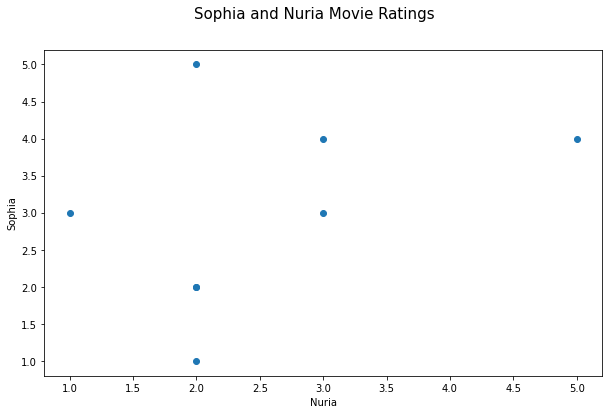

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
# Set a title
fig.suptitle('Sophia and Nuria Movie Ratings', 
             fontsize=15)
# Set axis labels
ax.set_ylabel("Sophia")
ax.set_xlabel("Nuria")
# Scatter plot
ax.scatter(Nuria_ser,Sophia_ser)

The correlation between these two critics is not great.

**Maria and Nerea**

In [10]:
# Locate only Maria
Maria_df = crit_df.loc[crit_df["User"]=="Maria"]
# Drop User column to get only values
Maria_df = Maria_df.drop(["User"],1)
# Conver DataFrame to series
Maria_ser = Maria_df.iloc[0]
#Maria_ser

In [11]:
# Locate only Nerea
Nerea_df = crit_df.loc[crit_df["User"]=="Nerea"]
# Drop User column to get only values
Nerea_df = Nerea_df.drop(["User"],1)
# Conver DataFrame to series
Nerea_ser = Nerea_df.iloc[0]
#Nerea_ser

In [12]:
Pearson1 = Maria_ser.corr(Nerea_ser,method='pearson')
print("The Pearson correlation coefficient for Maria and Nerea is:", Pearson1)

The Pearson correlation coefficient for Maria and Nerea is: -0.3009646327144231


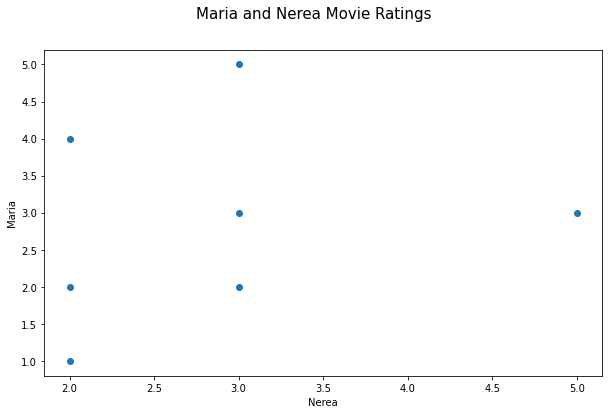

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
# Set a title
fig.suptitle('Maria and Nerea Movie Ratings', 
             fontsize=15)
# Set axis labels
ax.set_ylabel("Maria")
ax.set_xlabel("Nerea")
# Scatter plot
ax.scatter(Nuria_ser,Maria_ser)

Look like we have a worse correlation between Maria and Nerea, than the one between Sophia and Nuria.

**Chris and Jim**

In [14]:
# Locate only Chris
Chris_df = crit_df.loc[crit_df["User"]=="Chris"]
# Drop User column to get only values
Chris_df = Chris_df.drop(["User"],1)
# Conver DataFrame to series
Chris_ser = Chris_df.iloc[0]
#Chris_ser

In [15]:
# Locate only Jim
Jim_df = crit_df.loc[crit_df["User"]=="Jim"]
# Drop User column to get only values
Jim_df = Jim_df.drop(["User"],1)
# Conver DataFrame to Series
Jim_ser = Jim_df.iloc[0]
#Jim_ser

In [16]:
Pearson2 = Chris_ser.corr(Jim_ser,method='pearson')
print("The Pearson correlation coefficient for Chris and Jim is:", Pearson2)

The Pearson correlation coefficient for Chris and Jim is: 0.8255243089185106


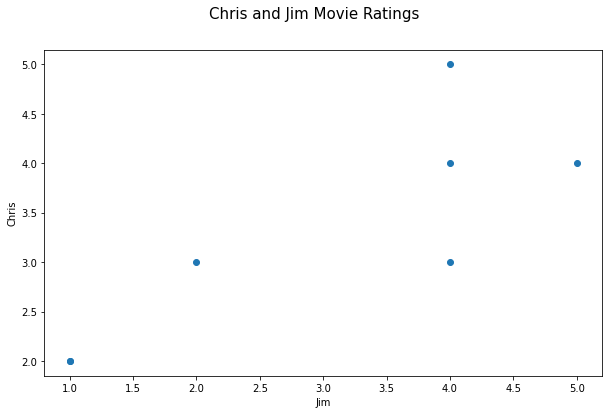

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
# Set a title
fig.suptitle('Chris and Jim Movie Ratings', 
             fontsize=15)
# Set axis labels
ax.set_ylabel("Chris")
ax.set_xlabel("Jim")
# Scatter plot
ax.scatter(Jim_ser,Chris_ser)

There is much higher correlation between Jim and Chris' movie reviews than the previous two comparisons.

This means we can more easily recommend Jim movies that Chris likes, and viceversa.

**3) Top Recommendations**

Return the top 5 recommended movies for Sophia. Use the weighted average of every other critic's rankings.

First lets transpose Sophia's DataFrame to give it the right format for iterating.

In [18]:
Sophia_df = Sophia_df.transpose()
#Sophia_df

Now, lets make a DataFrame with everyone but Sophia.

In [45]:
# Selecting all but Sophia
NoSoph_df = crit_df.loc[crit_df["User"]!='Sophia']
# Reseting the index
NoSoph_df = NoSoph_df.reset_index()
# Select only the ratings
NoSophia_df = NoSoph_df.iloc[:,2:]
NoSoph_df

,index,User,Star Wars IV - A New Hope,Star Wars VI - Return of the Jedi,Forrest Gump,The Shawshank Redemption,The Silence of the Lambs,Gladiator,Toy Story,Saving Private Ryan,...,Shakespeare in Love,Total Recall,Independence Day,Blade Runner,Groundhog Day,The Matrix,Schindler's List,The Sixth Sense,Raiders of the Lost Ark,Babe
0,0,John,1.0,5.0,2.0,NaN,4.0,4.0,2.0,2.0,...,2.0,NaN,5.0,2.0,NaN,4.0,2.0,5.0,NaN,NaN
1,1,Maria,5.0,3.0,NaN,2.0,4.0,2.0,1.0,NaN,...,3.0,2.0,2.0,NaN,2.0,NaN,5.0,1.0,3.0,NaN
2,2,Anton,NaN,NaN,NaN,5.0,2.0,NaN,4.0,NaN,...,NaN,1.0,4.0,4.0,1.0,1.0,2.0,3.0,1.0,3.0
3,3,Roger,NaN,3.0,NaN,NaN,NaN,1.0,2.0,3.0,...,NaN,4.0,1.0,3.0,5.0,NaN,5.0,1.0,1.0,2.0
4,4,Martina,4.0,3.0,4.0,1.0,4.0,1.0,NaN,4.0,...,5.0,1.0,NaN,4.0,NaN,3.0,5.0,5.0,NaN,NaN
5,5,Ana,2.0,4.0,4.0,4.0,NaN,NaN,3.0,1.0,...,5.0,2.0,4.0,NaN,1.0,NaN,NaN,3.0,NaN,2.0
6,6,Sergi,NaN,NaN,3.0,1.0,1.0,4.0,NaN,5.0,...,1.0,NaN,NaN,3.0,NaN,1.0,NaN,NaN,5.0,2.0
7,7,Marc,4.0,NaN,NaN,NaN,3.0,2.0,2.0,NaN,...,NaN,2.0,3.0,2.0,4.0,NaN,1.0,3.0,5.0,NaN
8,8,Jim,5.0,1.0,NaN,4.0,2.0,4.0,4.0,4.0,...,2.0,3.0,1.0,NaN,5.0,NaN,NaN,NaN,NaN,5.0
9,9,Chris,4.0,2.0,NaN,5.0,3.0,NaN,4.0,3.0,...,NaN,NaN,2.0,NaN,NaN,2.0,5.0,1.0,NaN,NaN


Now its time to iterate over the DataFrames computing Sophia's correlation with every other person.

In [49]:
Pearsons = pd.DataFrame(np.zeros(shape=(len(NoSophia_df),2)))

for i in range(len(Pearsons)):
    
    transposer = NoSophia_df.iloc[i,:].transpose()
    
    corr = Sophia_df.corrwith(transposer, method='pearson')
    
    Pearsons.loc[i] = [NoSoph_df.iloc[i,1],corr]
    #Pearson.append(corr)

**The Pearson Correlations:**

In [50]:
Pearsons.head()

,0,1
0,John,0.277098
1,Maria,0.492592
2,Anton,-0.184664
3,Roger,-0.306989
4,Martina,0.047717


Turning the values into absolute for the weighted average computation

In [39]:
absolut = Pearsons.iloc[:,1].abs()
absolut

0     0.277098
1     0.492592
2     0.184664
3     0.306989
4     0.047717
5     0.597614
6     0.036370
7     0.079342
8     0.444514
9     0.344265
10    0.186500
11    0.365148
12    0.205738
13    0.427325
14    0.732777
15    0.944911
16    0.587378
17    0.578979
18    0.088113
Name: 1, dtype: float64

In [24]:
absolut_sum = absolut.sum()
absolut_sum

6.928035156362429

Sophia's average rating

In [40]:
Sophia_avg = Sophia_df.mean(axis=0)
Sophia_avg

14    3.153846
dtype: float64

Other's average rating

In [26]:
Others_avg = NoSophia_df.mean(axis=1)
#Others_avg

Lets make a Dataframe with the movies Sophia has not watched. 

In [41]:
nulls = Sophia_df.isnull().iloc[:,0]
Sophianotwatched = NoSophia_df.loc[:,nulls]
Sophianotwatched.head()

,Forrest Gump,The Shawshank Redemption,Saving Private Ryan,Shakespeare in Love,Blade Runner,The Matrix,The Sixth Sense
0,2.0,NaN,2.0,2.0,2.0,4.0,5.0
1,NaN,2.0,NaN,3.0,NaN,NaN,1.0
2,NaN,5.0,NaN,NaN,4.0,1.0,3.0
3,NaN,NaN,3.0,NaN,3.0,NaN,1.0
4,4.0,1.0,4.0,5.0,4.0,3.0,5.0


Applying the Weighted Average Formula

In [43]:
middle = Sophianotwatched.subtract(Others_avg,axis=0)

In [29]:
top = middle.mul(absolut,axis=0).sum()
type(top)

pandas.core.series.Series

In [30]:
bottom = absolut_sum

In [31]:
right = top.div(bottom,axis=0)
right

Forrest Gump               -0.295638
The Shawshank Redemption    0.426743
Saving Private Ryan        -0.320035
Shakespeare in Love         0.218879
Blade Runner                0.073694
The Matrix                  0.192163
The Sixth Sense            -0.260910
dtype: float64

In [32]:
Rankings = right+Sophia_avg.values
Rankings.sort_values(ascending=False).head(5)

The Shawshank Redemption    3.580589
Shakespeare in Love         3.372725
The Matrix                  3.346010
Blade Runner                3.227540
The Sixth Sense             2.892936
dtype: float64

Finally, we get the top 5 movies recommended for Sophia in terms of her similarity to other critics.

**4) Top similar critics**

Return the top 5 critics that are most similar to Sophia. 

In [33]:
Pearsons.sort_values(by=1, ascending=False).head()

,0,1
15,Rachel,0.944911
5,Ana,0.597614
17,Oriol,0.578979
1,Maria,0.492592
13,Carles,0.427325


These are the top 5 most similar critics to Sophia. We can see this information to recommend movies to her based on the ratings of these 5 users. 